In [602]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning Compendium of Actions

### Combine sf columns and delete columns that overlap in purpose
### Combine bathrooms and drop overlapping columns
### Drop totrmsabvgrnd because it is redundant with count of bedrooms and kitchens


### Rank Ordinals Numerically
* Ordinals were subjectively ranked based on domain knowledge. Most were just ordered by rank from worst to best with worst being 1 and best being a higher value at step 1 depending on n length of ordinal values. Some were subjectively decided to have higher than step 1 to achieve a greater magnitude of influence. I tried to do this sparingly but in some cases I thought this would make sense. Ordinals with NA were replaced with 0

### Square Feet and Sale Price Analysis
* There appear to be three identifiable outliers above 6000sf. 
* some of these very large homes do not seem to be selling for what they should selling for on a price per square feet basis. (possible sales to family members for values less than market price, fraud, or error in recording). 
* [X] I will remove these values.  

### Mean, Min., Max, and Standard Deviation for all Columns
* [X] Noticed that ms_subclass is a numerical column when it should be categorical. Change to string object. 
* [X] pid column is also included in the dataframe and is just a reference column used for externally access to individual records. I will remove this column. 

### Examining lot_area
* [X] seems to be a few large outliers in lot area. 471 has 159,000 and 694 has 115,149. The mean is only 10,000. I will run a box plot on this to further examine.
* The largest lot area home at 159,000sf was built in 1958 but remodeled 1 year before sale in 2006. It has large square footage and lot area in relation to sale price but I cannot rule out that other factors affect price. I will not remove this outlier. 
* The second largest lot area also seems legit and not unusual. larger square footage from home that was built in 1971 but remodeled in 2002 before sale in 2007. I will not remove this outlier either. 


### Examining mas_vnr_area
* [X] seems to be some large values in mas_vnr_area. mean is 98 and the five largest values are above 1000. Probably not that unusual for expensive homes but worth examing further. 
* Nothing out of the ordinary with 1600 value. 
* The lower values seem normal as well. I will leave this columns alone. 

### Examining garage_yr_blt
* [X] garage year built has a value pf 2207 which must be wrong. I am going to examine that record to see if there is housing year built or upgrade year data to confirm my suspicion that this is actually meant to say 2007. 
* [X] identified that the house was built in 2006 and year remodeled was 2007 so I am assuming garage year built was 2007 and the 2207 was actually a misprint. Changed the value. 

### Examining misc_val
* [X] largest value is significantly higher than all the rest and much higher than the mean. This is a column where there are also not very many values. I may consider deleting this column or perhaps eliminating the outlier. Need to examine further.
* [X] I have decided to eliminate the misc_val column due to large number of zero values. 

### Examining ttl_bath
* [X] I am deciding to do nothing with the outliers in ttl_bath. I do not think they are not too far, all things considered. 

### Examing saleprice 
* [X] Examine Sale Price. There doesn't seem to exist any unacounted for reasons for larger salesprices. All of the 52 homes that sold for saleprices that were 3 standard deviations above the mean had characteristics that would justify such a sale. There were no homes that sold for less than 3 standard deviations away from the mean. 

### Evaluating Year Sold
* [X] Evaluating year sold. There doesn't appear to be any outliers in year sold.
* NOTE: There is not a full year of data for 2010

### Fill Nulls in Ordinals with value of 1
* I chose 1 because I didn't want a value of zero to ruin any calculations in complex modeling. 

### Add 'saleprice' column to ordinals_df
* adding saleprice to ordinals because I am going to future analysis on just ordinals before dropping saleprice column and concatenating ordinals with other dfs to reform original dataframe


# INITIAL OUTLIER ANALYSIS
* The first outliers I will be targeting will be outliers regardins square footage. In the data dictionary the author mentioned 5 values that may want to be removed because of their outsized effect on the data. He mentioned a simple analysis between sale price and above ground living space would identify them. I have already combined all square footage columns including above ground living space so I will analyze total square feet and sale price. 
* I will then go through value counts, minimum and maximums, standard deviations and nlargest to find initially glaring outliers. There will some use of charts to further elucidate findings. 

### Compendium of Findings and Actions Performed During Outlier Analysis (below)

##### Square Feet and Sale Price Analysis
* There appear to be three identifiable outliers above 6000sf. 
* some of these very large homes do not seem to be selling for what they should selling for on a price per square feet basis. (possible sales to family members for values less than market price, fraud, or error in recording). 
* [X] I will remove these values.

##### Mean, Min., Max, and Standard Deviation for all Columns
* [X] Noticed that ms_subclass is a numerical column when it should be categorical. Change to string object. 
* [X] pid column is also included in the dataframe and is just a reference column used for externally access to individual records. I will remove this column.

##### Examining lot_area
* [X] seems to be a few large outliers in lot area. 471 has 159,000 and 694 has 115,149. The mean is only 10,000. I will run a box plot on this to further examine.
* The largest lot area home at 159,000sf was built in 1958 but remodeled 1 year before sale in 2006. It has large square footage and lot area in relation to sale price but I cannot rule out that other factors affect price. I will not remove this outlier. 
* The second largest lot area also seems legit and not unusual. larger square footage from home that was built in 1971 but remodeled in 2002 before sale in 2007. I will not remove this outlier either. 

##### Examining mas_vnr_area
* [X] seems to be some large values in mas_vnr_area. mean is 98 and the five largest values are above 1000. Probably not that unusual for expensive homes but worth examing further. 
* Nothing out of the ordinary with 1600 value. 
* The lower values seem normal as well. I will leave this columns alone. 

##### Examining garage_yr_blt
* [X] garage year built has a value pf 2207 which must be wrong. I am going to examine that record to see if there is housing year built or upgrade year data to confirm my suspicion that this is actually meant to say 2007. 
* [X] identified that the house was built in 2006 and year remodeled was 2007 so I am assuming garage year built was 2007 and the 2207 was actually a misprint. Changed the value. 

##### Examining misc_val
* [X] largest value is significantly higher than all the rest and much higher than the mean. This is a column where there are also not very many values. I may consider deleting this column or perhaps eliminating the outlier. Need to examine further.
* [X] I have decided to eliminate the misc_val column due to large number of zero values. 

##### Examining ttl_bath
* [X] I am deciding to do nothing with the outliers in ttl_bath. I do not think they are not too far, all things considered. 

##### Examing saleprice 
* [X] Examine Sale Price. There doesn't seem to exist any unacounted for reasons for larger salesprices. All of the 52 homes that sold for saleprices that were 3 standard deviations above the mean had characteristics that would justify such a sale. There were no homes that sold for less than 3 standard deviations away from the mean. 

##### Evaluating Year Sold
* [X] Evaluating year sold. There doesn't appear to be any outliers in year sold.
* NOTE: There is not a full year of data for 2010


### Read in Training Data

In [603]:
ames = pd.read_csv('/Users/jamesopacich/Documents/dsi/projects/project_2/starter_data/train.csv')

In [604]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [605]:
ames.shape

(2051, 81)

In [606]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

### Read in Test Data

In [607]:
test = pd.read_csv('/Users/jamesopacich/Documents/dsi/projects/project_2/starter_data/test.csv')

In [608]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [609]:
ames.shape

(2051, 81)

In [610]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

##### Change column names to lower and _

Training

In [611]:
ames.columns = ames.columns.str.lower().str.replace(' ', '_')

In [612]:
ames.columns;

In [613]:
test.shape

(878, 80)

Test

In [614]:
test.columns = test.columns.str.lower().str.replace(' ', '_')

In [615]:
test.columns;

In [616]:
test.shape

(878, 80)

# Initial Combining and Dropping of Columns

### Combine sf columns and delete columns that overlap in purpose

Train

In [617]:
ames['ttl_sf'] = ames['total_bsmt_sf'] + ames['gr_liv_area']

In [618]:
ames['ttl_sf'].mean()

2557.612195121951

In [619]:
overlap_sf = ['bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmtfin_sf_1', 'total_bsmt_sf', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area']

In [620]:
ames.drop(columns = overlap_sf, inplace = True)

In [621]:
ames.shape

(2051, 74)

Test

In [622]:
test['ttl_sf'] = test['total_bsmt_sf'] + test['gr_liv_area']

In [623]:
test['ttl_sf'].mean()

2531.2722095671984

In [624]:
test.drop(columns = overlap_sf, inplace = True)

In [625]:
test.shape

(878, 73)

### Combine bathrooms and drop overlapping columns

Train

In [626]:
ames['ttl_bath'] = ames['full_bath'] + (.5 * ames['half_bath']) + ames['bsmt_full_bath'] + (.5 * ames['bsmt_half_bath'])

In [627]:
ames['ttl_bath'].head()

0    2.5
1    3.5
2    2.0
3    2.5
4    2.0
Name: ttl_bath, dtype: float64

In [628]:
ames.drop(columns = ['full_bath', 'half_bath', 'bsmt_full_bath', 'bsmt_half_bath'], inplace = True)

In [629]:
ames.shape

(2051, 71)

Test

In [630]:
test['ttl_bath'] = test['full_bath'] + (.5 * test['half_bath']) + test['bsmt_full_bath'] + (.5 * test['bsmt_half_bath'])

In [631]:
test.drop(columns = ['full_bath', 'half_bath', 'bsmt_full_bath', 'bsmt_half_bath'], inplace = True)

In [632]:
test.shape

(878, 70)

### Drop totrmsabvgrnd because it is redundant with count of bedrooms and kitchens

Train

In [633]:
ames.drop(columns = ['totrms_abvgrd'], axis = 1, inplace = True)

In [634]:
ames.shape

(2051, 70)

Test

In [635]:
test.drop(columns = ['totrms_abvgrd'], axis = 1, inplace = True)

In [636]:
test.shape

(878, 69)

In [637]:
test.columns;

In [638]:
def find_dtypes(df):
    #takes in a dataframe returns lists of columns with corresponding data types
    flt_list = []
    int_list = []
    str_list = []
    
    for item in df.columns:
        if df[item].dtypes == float:
            flt_list.append(item)
        if df[item].dtypes == int:
            int_list.append(item)
        if df[item].dtypes == object:
            str_list.append(item)
    print( f'FLOATS:',  flt_list)
    print( f'INTEGERS:',  int_list)
    print( f'STRINGS:',  str_list)

In [639]:
#calling function to return all datatypes for all columns
find_dtypes(ames)

FLOATS: ['lot_frontage', 'mas_vnr_area', 'garage_yr_blt', 'garage_cars', 'garage_area', 'ttl_sf', 'ttl_bath']
INTEGERS: ['id', 'pid', 'ms_subclass', 'lot_area', 'overall_qual', 'overall_cond', 'year_built', 'year_remod/add', 'bedroom_abvgr', 'kitchen_abvgr', 'fireplaces', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice']
STRINGS: ['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc', 'central_air', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_f

# Rank Ordinals Numerically

##### Ordinals were subjectively ranked based on domain knowledge. Most were just ordered by rank from worst to best with worst being 1 and best being a higher value at step 1 depending on n length of ordinal values. Some were subjectively decided to have higher than step 1 to achieve a greater magnitude of influence. I tried to do this sparingly but in some cases I thought this would make sense. Ordinals with NA were replaced with 0

In [640]:
ordinals_test = {
            'lot_shape' : {'Reg' : 1, 'IR1': 2, 'IR2': 3, 'IR3': 4},
            'utilities' : {'AllPub' : 10 , 'NoSewr' : 5 , 'NoSeWa' : 2, 'ELO' :  1},
            'land_slope' : {'Gtl' : 3 , 'Mod' : 2 , 'Sev': 1 },
            'exter_qual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1 },
            'exter_cond' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1 },
            'bsmt_qual'  : {'Ex' : 6, 'Gd' : 5, 'TA' : 4, 'Fa' : 3, 'Po' : 2, 'NA' : 0},
            'bsmt_cond'  : {'Ex' : 6, 'Gd' : 5, 'TA' : 4, 'Fa' : 3, 'Po' : 2, 'NA' : 0}, 
            'bsmt_exposure' : {'Gd': 5, 'Av': 4, 'Mn': 3, 'No': 2, 'NA': 0},
            'bsmtfin_type_1' : {'GLQ': 8, 'ALQ': 6, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 2 , 'NA': 0},
            'bsmtfin_type_2' : {'GLQ': 8, 'ALQ': 6, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 2 , 'NA': 0},
            'heating_qc' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1 }, 
            'electrical' : {'SBrkr' : 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1},
            'kitchen_qual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1 },
            'functional' : {'Typ': 10, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1},
            'fireplace_qu' : {'Ex' : 6, 'Gd': 5 , 'TA': 4, 'Fa': 3, 'Po' : 2, 'NA' : 0},
            'garage_finish' : {'Fin' : 5, 'RFn' : 3, 'Unf': 2, 'NA': 0},
            'garage_qual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1 },
            'garage_cond' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1 },
            'paved_drive' : {'Y' : 5, 'P' : 2, 'N' : 1},
            'pool_qc' : {'Ex' : 5, 'Gd': 4 , 'TA': 3, 'Fa': 2, 'NA' : 0},
            'fence' : {'GdPrv' : 6, 'MnPrv' : 4, 'GdWo' : 3, 'MnWw' : 2, 'NA' : 0}
           }

_____________________________

### Square Feet and Sale Price Analysis
* There appear to be three identifiable outliers above 6000sf. 
* some of these very large homes do not seem to be selling for what they should selling for on a price per square feet basis. (possible sales to family members for values less than market price, fraud, or error in recording). 
* [X] I will remove these values.  

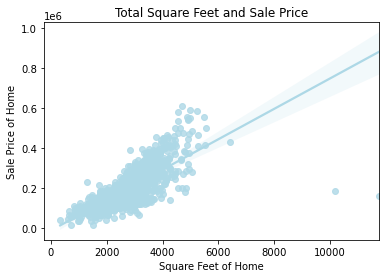

In [641]:
sns.regplot(data = ames,
            x = 'ttl_sf',
            y = 'saleprice',
            scatter = True,
            color = 'lightblue',
            x_jitter = 1,
            y_jitter = 1).set_title('Total Square Feet and Sale Price')

plt.xlabel('Square Feet of Home')
plt.ylabel('Sale Price of Home');

In [642]:
ames['saleprice'].mean()

181469.70160897123

In [643]:
ames['ttl_sf'].mean()

2557.612195121951

In [644]:
ames['ttl_sf'].nlargest(10)

960     11752.0
1885    10190.0
328      6428.0
1227     5542.0
1897     5508.0
1164     5496.0
1389     5271.0
1117     5266.0
1692     5233.0
1700     5066.0
Name: ttl_sf, dtype: float64

##### Removing top three square footage values

In [645]:
ames.iloc[960, :]

id                   1499
pid             908154235
ms_subclass            60
ms_zoning              RL
lot_frontage          313
                  ...    
yr_sold              2008
sale_type             New
saleprice          160000
ttl_sf              11752
ttl_bath              4.5
Name: 960, Length: 70, dtype: object

In [646]:
ames.drop([960, 1885, 328], inplace = True)
ames.reset_index(inplace = True);

In [647]:
ames['ttl_sf'].nlargest(5)

1225    5542.0
1894    5508.0
1162    5496.0
1387    5271.0
1115    5266.0
Name: ttl_sf, dtype: float64

In [648]:
def mass_value(df):
    # function that takes in a dataframe and returns value_counts for all columns. 
    value_list = []
    for item in df.columns:
        value_list.append(item.upper())
        value_list.append(df[item].value_counts())
    return value_list

### Mean, Min., Max, and Standard Deviation for all Columns
* [X] Noticed that ms_subclass is a numerical column when it should be categorical. Change to string object. 
* [X] pid column is also included in the dataframe and is just a reference column used for externally access to individual records. I will remove this column. 


In [649]:
def mean_min_max_std(df):
    # function that takes in a dataframe and returns value_counts for all columns. 
    value_list = []
    for item in df.columns:
        if df[item].dtypes == float or df[item].dtypes == int:
            value_list.append((f'{item.upper()}',
                              f' mean: {df[item].mean()}',
                              f' min: {df[item].min()}',
                              f' max: {df[item].max()}',
                              f' std_dev: {df[item].std()}'))
    return value_list
    

In [650]:
# Call function that produces mean, min, max and std deviation for all columns
mean_min_max_std(ames)

[('INDEX',
  ' mean: 1024.9521484375',
  ' min: 0',
  ' max: 2050',
  ' std_dev: 592.1438166647833'),
 ('ID',
  ' mean: 1473.5302734375',
  ' min: 1',
  ' max: 2930',
  ' std_dev: 844.4283260944197'),
 ('PID',
  ' mean: 713490443.3662109',
  ' min: 526301100',
  ' max: 924152030',
  ' std_dev: 188687663.30113894'),
 ('MS_SUBCLASS',
  ' mean: 57.04345703125',
  ' min: 20',
  ' max: 190',
  ' std_dev: 42.83991133381938'),
 ('LOT_FRONTAGE',
  ' mean: 68.87899941826643',
  ' min: 21.0',
  ' max: 313.0',
  ' std_dev: 22.472112220176488'),
 ('LOT_AREA',
  ' mean: 10023.37548828125',
  ' min: 1300',
  ' max: 159000',
  ' std_dev: 6609.86271085122'),
 ('OVERALL_QUAL',
  ' mean: 6.107421875',
  ' min: 1',
  ' max: 10',
  ' std_dev: 1.4215122965809082'),
 ('OVERALL_COND',
  ' mean: 5.56298828125',
  ' min: 1',
  ' max: 9',
  ' std_dev: 1.1050964478813847'),
 ('YEAR_BUILT',
  ' mean: 1971.66357421875',
  ' min: 1872',
  ' max: 2010',
  ' std_dev: 30.175315801996653'),
 ('YEAR_REMOD/ADD',
  ' mean

##### Changing ms_subclass to string object

In [651]:
ames['ms_subclass'] = ames['ms_subclass'].astype(str)

In [652]:
ames.dtypes

index            int64
id               int64
pid              int64
ms_subclass     object
ms_zoning       object
                ...   
yr_sold          int64
sale_type       object
saleprice        int64
ttl_sf         float64
ttl_bath       float64
Length: 71, dtype: object

##### nlargest() for all columns

In [653]:
def mass_largest(df):
    # function that takes in a dataframe and returns largest values for all columns. 
    value_list = []
    for item in df.columns:
        if df[item].dtypes == float or df[item].dtypes == int:
            value_list.append(item.upper())
            value_list.append(df[item].nlargest(5))
    return value_list

In [654]:
# call function that produces nlargest for all columns
mass_largest(ames)

['INDEX',
 2047    2050
 2046    2049
 2045    2048
 2044    2047
 2043    2046
 Name: index, dtype: int64,
 'ID',
 521     2930
 650     2929
 415     2927
 1476    2926
 1011    2924
 Name: id, dtype: int64,
 'PID',
 1031    924152030
 521     924151050
 1322    924151040
 650     924100070
 506     924100060
 Name: pid, dtype: int64,
 'LOT_FRONTAGE',
 1333    313.0
 1873    200.0
 440     195.0
 1261    174.0
 1222    160.0
 Name: lot_frontage, dtype: float64,
 'LOT_AREA',
 470     159000
 693     115149
 1852     70761
 744      57200
 822      53504
 Name: lot_area, dtype: int64,
 'OVERALL_QUAL',
 41     10
 138    10
 199    10
 201    10
 331    10
 Name: overall_qual, dtype: int64,
 'OVERALL_COND',
 102    9
 345    9
 350    9
 356    9
 373    9
 Name: overall_cond, dtype: int64,
 'YEAR_BUILT',
 144    2010
 19     2009
 70     2009
 172    2009
 368    2009
 Name: year_built, dtype: int64,
 'YEAR_REMOD/ADD',
 70     2010
 142    2010
 144    2010
 172    2010
 368    2010
 N

### Examining lot_area
* [X] seems to be a few large outliers in lot area. 471 has 159,000 and 694 has 115,149. The mean is only 10,000. I will run a box plot on this to further examine.
* The largest lot area home at 159,000sf was built in 1958 but remodeled 1 year before sale in 2006. It has large square footage and lot area in relation to sale price but I cannot rule out that other factors affect price. I will not remove this outlier. 
* The second largest lot area also seems legit and not unusual. larger square footage from home that was built in 1971 but remodeled in 2002 before sale in 2007. I will not remove this outlier either. 

In [655]:
ames['lot_area'].mean()

10023.37548828125

In [656]:
ames['lot_area'].nlargest()

470     159000
693     115149
1852     70761
744      57200
822      53504
Name: lot_area, dtype: int64

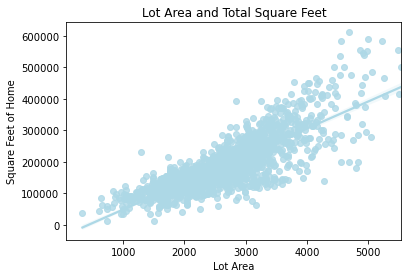

In [657]:
sns.regplot(data = ames,
            x = 'ttl_sf',
            y = 'saleprice',
            scatter = True,
            color = 'lightblue',
            x_jitter = 1,
            y_jitter = 1).set_title('Lot Area and Total Square Feet')

plt.xlabel('Lot Area')
plt.ylabel('Square Feet of Home');

In [658]:
ames.iloc[470, -60:];

ames.iloc[693, -60:];

### Examining mas_vnr_area
* [X] seems to be some large values in mas_vnr_area. mean is 98 and the five largest values are above 1000. Probably not that unusual for expensive homes but worth examing further. 
* Nothing out of the ordinary with 1600 value. 
* The lower values seem normal as well. I will leave this columns alone. 

In [659]:
ames['mas_vnr_area'].mean()

98.84649555774926

In [660]:
ames['mas_vnr_area'].nlargest()

1407    1600.0
1149    1129.0
377     1115.0
488     1110.0
1225    1095.0
Name: mas_vnr_area, dtype: float64

In [661]:
ames.iloc[1407, -60:];

In [662]:
ames.iloc[1149, -60:];

In [663]:
ames.iloc[377, -60:];

### Examining garage_yr_blt
* [X] garage year built has a value pf 2207 which must be wrong. I am going to examine that record to see if there is housing year built or upgrade year data to confirm my suspicion that this is actually meant to say 2007. 
* [X] identified that the house was built in 2006 and year remodeled was 2007 so I am assuming garage year built was 2007 and the 2207 was actually a misprint. Changed the value. 

In [664]:
ames['garage_yr_blt'].nlargest()

1697    2207.0
144     2010.0
1239    2010.0
19      2009.0
70      2009.0
Name: garage_yr_blt, dtype: float64

In [665]:
ames['garage_yr_blt'].replace(2207, 2007, inplace = True)

In [666]:
ames['garage_yr_blt'].max()

2010.0

### Examining misc_val
* [X] largest value is significantly higher than all the rest and much higher than the mean. This is a column where there are also not very many values. I may consider deleting this column or perhaps eliminating the outlier. Need to examine further.
* [X] I have decided to eliminate the misc_val column due to large number of zero values. 

In [667]:
ames['misc_val'][ames['misc_val'] > 0].mean()

1387.171875

##### Dropping misc_vals

In [668]:
ames.drop(columns = ['misc_val'], inplace = True)

In [669]:
ames.columns;

### Examining ttl_bath
* [X] I am deciding to do nothing with the outliers in ttl_bath. I do not think they are not too far, all things considered. 

In [670]:
ames['ttl_bath'].mean()

2.2187194525904204

In [671]:
ames['ttl_bath'].nlargest()

1564    7.0
1603    7.0
790     6.0
1582    6.0
1323    5.0
Name: ttl_bath, dtype: float64

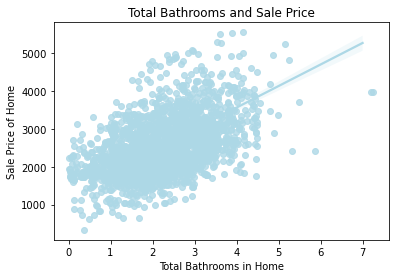

In [672]:
sns.regplot(data = ames,
            x = 'ttl_bath',
            y = 'ttl_sf',
            scatter = True,
            color = 'lightblue',
            x_jitter = 1,
            y_jitter = 1).set_title('Total Bathrooms and Sale Price')

plt.xlabel('Total Bathrooms in Home')
plt.ylabel('Sale Price of Home');

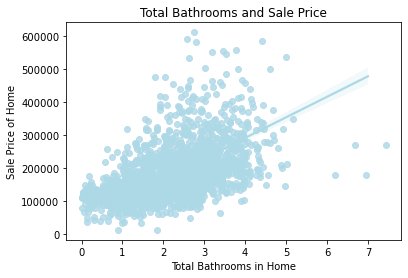

In [673]:
sns.regplot(data = ames,
            x = 'ttl_bath',
            y = 'saleprice',
            scatter = True,
            color = 'lightblue',
            x_jitter = 1,
            y_jitter = 1).set_title('Total Bathrooms and Sale Price')

plt.xlabel('Total Bathrooms in Home')
plt.ylabel('Sale Price of Home');

In [674]:
ames[ames['ttl_bath'] > 5]

,index,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,...,pool_area,pool_qc,fence,misc_feature,mo_sold,yr_sold,sale_type,saleprice,ttl_sf,ttl_bath
790,791,763,904301060,90,RL,60.0,10800,Pave,NaN,Reg,...,0,NaN,NaN,NaN,3,2009,WD,179000,2400.0,6.0
1564,1566,816,906230010,90,RL,NaN,11855,Pave,NaN,Reg,...,0,NaN,NaN,NaN,10,2009,WD,269500,3955.0,7.0
1582,1584,764,904301070,90,RL,60.0,10800,Pave,NaN,Reg,...,0,NaN,NaN,NaN,3,2009,WD,179000,2400.0,6.0
1603,1605,817,906230020,90,RL,NaN,7939,Pave,NaN,Reg,...,0,NaN,NaN,NaN,10,2009,WD,269500,3955.0,7.0


### Examing saleprice 
* [X] Examine Sale Price. There doesn't seem to exist any unacounted for reasons for larger salesprices. All of the 52 homes that sold for saleprices that were 3 standard deviations above the mean had characteristics that would justify such a sale. There were no homes that sold for less than 3 standard deviations away from the mean. 

In [675]:
# 3 standard deviations away from the mean is 237374
std3_saleprice = ames['saleprice'].std() *3
std3_saleprice

237374.2596402525

In [676]:
sale_mean = ames['saleprice'].mean()

##### List of homes that are 3 standard deviations above the mean

In [677]:
ames[ames['saleprice'] > (sale_mean + std3_saleprice)];

##### List of homes that are 3 standard deviations below the mean

In [678]:
ames[ames['saleprice'] < (sale_mean - std3_saleprice)]

,index,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,...,pool_area,pool_qc,fence,misc_feature,mo_sold,yr_sold,sale_type,saleprice,ttl_sf,ttl_bath


##### value_counts() for all columns

In [679]:
mass_value(ames)

['INDEX',
 2047    1
 2045    1
 1348    1
 1350    1
 1352    1
        ..
 691     1
 693     1
 695     1
 697     1
 0       1
 Name: index, Length: 2048, dtype: int64,
 'ID',
 2047    1
 2045    1
 1058    1
 1060    1
 1062    1
        ..
 2548    1
 2550    1
 2552    1
 505     1
 2049    1
 Name: id, Length: 2048, dtype: int64,
 'PID',
 532351060    1
 905101310    1
 916475110    1
 527451540    1
 908227040    1
             ..
 528344020    1
 908102320    1
 533215020    1
 902301130    1
 533250050    1
 Name: pid, Length: 2048, dtype: int64,
 'MS_SUBCLASS',
 20     768
 60     393
 50     198
 120    132
 30     101
 70      90
 160     88
 80      86
 90      75
 190     46
 85      28
 75      16
 180     11
 45      11
 40       4
 150      1
 Name: ms_subclass, dtype: int64,
 'MS_ZONING',
 RL         1595
 RM          316
 FV          101
 C (all)      19
 RH           14
 A (agr)       2
 I (all)       1
 Name: ms_zoning, dtype: int64,
 'LOT_FRONTAGE',
 60.0     17

### Evaluating Year Sold
* [X] Evaluating year sold. There doesn't appear to be any outliers in year sold.
* NOTE: There is not a full year of data for 2010

In [680]:
ames['yr_sold'].value_counts()

2007    496
2009    446
2006    438
2008    434
2010    234
Name: yr_sold, dtype: int64

### There is not a full year of data for 2010

In [681]:
ames['yr_sold'][ames['yr_sold'] == 2010].groupby(ames['mo_sold']).count()

mo_sold
1    16
2    21
3    35
4    52
5    53
6    53
7     4
Name: yr_sold, dtype: int64

# END INITIAL OUTLIER ANALYSIS
______________________________

# INITIAL CLEANING AND EDA ON ORDINALS

### Replace test set ordinals

In [682]:
# replace all strings in ordinals with values
for key, value in ordinals_test.items():
    test[key].replace(value, inplace = True)

### Replace training set ordinals

In [683]:
# replace all strings in ordinals with values
for key, value in ordinals_test.items():
    ames[key].replace(value, inplace = True)

In [684]:
#making sure all ordinal values have changed
mass_value(ames)

['INDEX',
 2047    1
 2045    1
 1348    1
 1350    1
 1352    1
        ..
 691     1
 693     1
 695     1
 697     1
 0       1
 Name: index, Length: 2048, dtype: int64,
 'ID',
 2047    1
 2045    1
 1058    1
 1060    1
 1062    1
        ..
 2548    1
 2550    1
 2552    1
 505     1
 2049    1
 Name: id, Length: 2048, dtype: int64,
 'PID',
 532351060    1
 905101310    1
 916475110    1
 527451540    1
 908227040    1
             ..
 528344020    1
 908102320    1
 533215020    1
 902301130    1
 533250050    1
 Name: pid, Length: 2048, dtype: int64,
 'MS_SUBCLASS',
 20     768
 60     393
 50     198
 120    132
 30     101
 70      90
 160     88
 80      86
 90      75
 190     46
 85      28
 75      16
 180     11
 45      11
 40       4
 150      1
 Name: ms_subclass, dtype: int64,
 'MS_ZONING',
 RL         1595
 RM          316
 FV          101
 C (all)      19
 RH           14
 A (agr)       2
 I (all)       1
 Name: ms_zoning, dtype: int64,
 'LOT_FRONTAGE',
 60.0     17

In [685]:
mass_value(test)

['ID',
 2721    1
 519     1
 2589    1
 540     1
 2587    1
        ..
 1189    1
 1188    1
 1174    1
 1171    1
 2       1
 Name: id, Length: 878, dtype: int64,
 'PID',
 532353020    1
 905401020    1
 906382040    1
 902202070    1
 923251160    1
             ..
 528240150    1
 907270050    1
 535451010    1
 527451520    1
 914475010    1
 Name: pid, Length: 878, dtype: int64,
 'MS_SUBCLASS',
 20     309
 60     180
 50      89
 120     60
 160     41
 70      38
 30      38
 90      34
 80      32
 85      20
 190     15
 75       7
 45       7
 180      6
 40       2
 Name: ms_subclass, dtype: int64,
 'MS_ZONING',
 RL         674
 RM         146
 FV          38
 RH          13
 C (all)      6
 I (all)      1
 Name: ms_zoning, dtype: int64,
 'LOT_FRONTAGE',
 60.0     97
 80.0     43
 70.0     37
 75.0     37
 50.0     27
          ..
 150.0     1
 37.0      1
 106.0     1
 31.0      1
 133.0     1
 Name: lot_frontage, Length: 104, dtype: int64,
 'LOT_AREA',
 7200     16
 9000

# Create ordinals_df

In [686]:
ordinals_list = ['lot_shape', 'utilities', 'land_slope', 
'exter_qual', 'exter_cond', 'bsmt_qual', 
'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1',
'bsmtfin_type_2', 'heating_qc', 'electrical', 
'kitchen_qual', 'functional', 'fireplace_qu',
'garage_finish', 'garage_qual', 'garage_cond',
'paved_drive', 'pool_qc', 'fence', 'overall_qual', 'overall_cond']

In [687]:
ordinals_df = ames[ordinals_list]

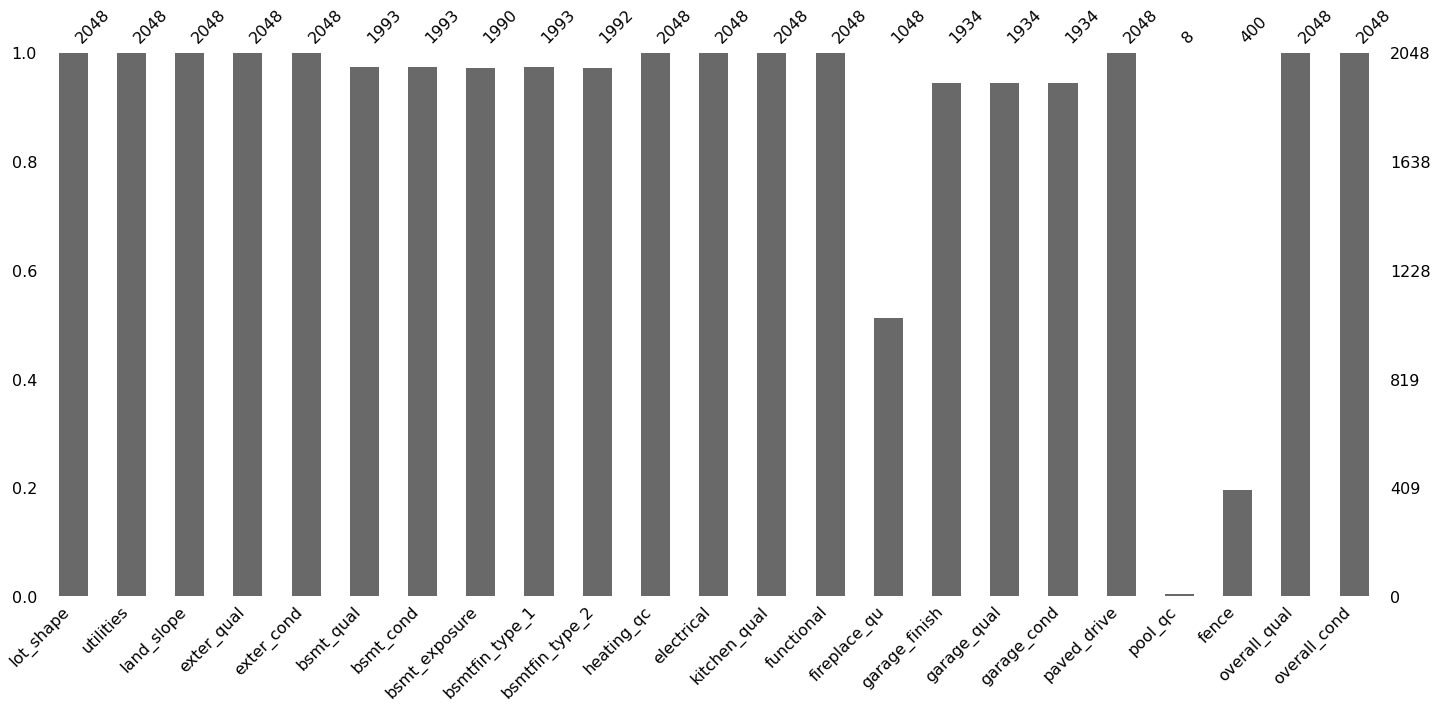

In [688]:
msno.bar(ordinals_df);

### Delete pool_qc, fence and fireplace_qu as they have greater than 50% nulls. 

In [689]:
ordinals_df.drop(columns = ['pool_qc', 'fireplace_qu', 'fence'], inplace = True)

/Users/jamesopacich/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Fill Nulls in Ordinals with value of 1
* I chose 1 because I didn't want a value of zero to ruin any calculations in complex modeling. 

In [690]:
def fill_na_string(df):
    #Cleans string object NaNs by replacing with a string
    for item in df.columns:
        df[item].fillna('1', inplace = True)

In [691]:
fill_na_string(ordinals_df)

/Users/jamesopacich/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


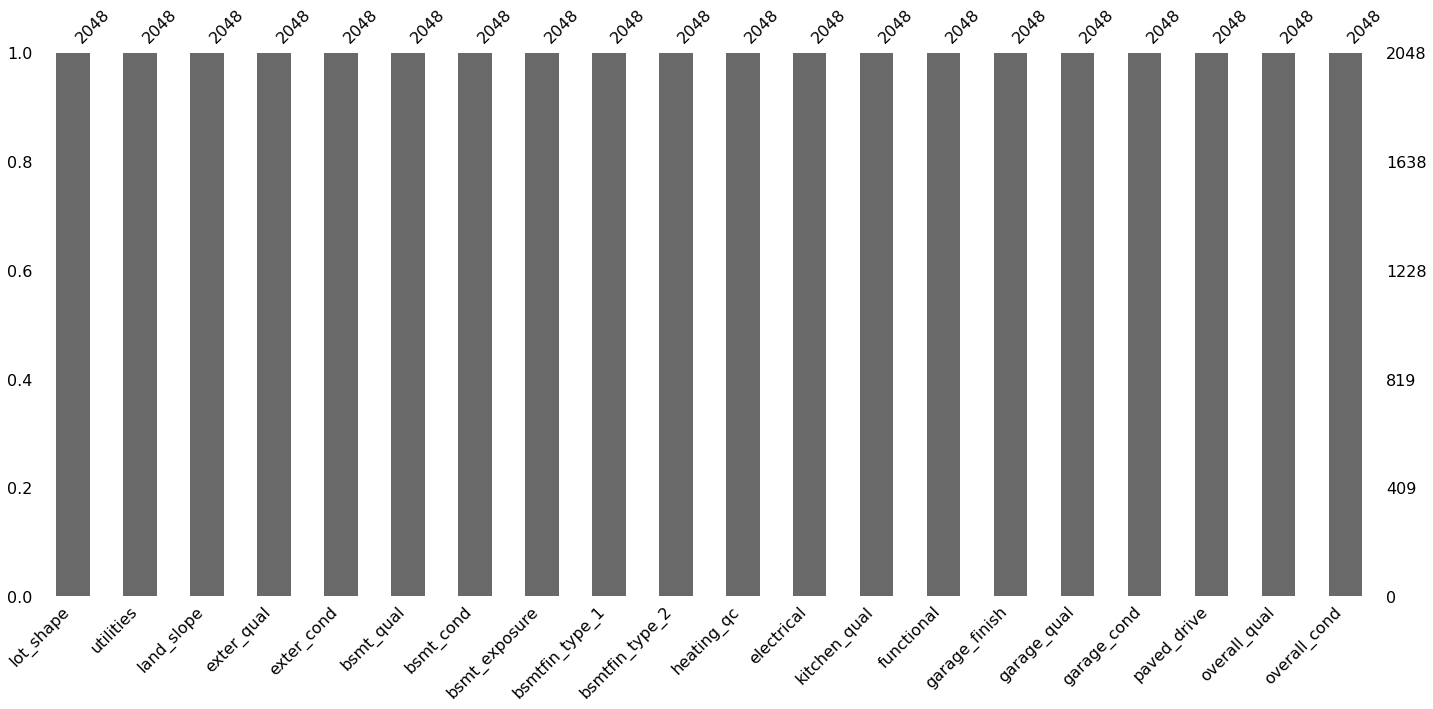

In [692]:
msno.bar(ordinals_df);

## Add 'saleprice' column to ordinals_df
* adding saleprice to ordinals because I am going to future analysis on just ordinals before dropping saleprice column and concatenating ordinals with other dfs to reform original dataframe

In [693]:
ordinals_df['saleprice'] = ames['saleprice']

<ipython-input-693-3b40a82018cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals_df['saleprice'] = ames['saleprice']


In [694]:
ordinals_df.head()

,lot_shape,utilities,land_slope,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,...,electrical,kitchen_qual,functional,garage_finish,garage_qual,garage_cond,paved_drive,overall_qual,overall_cond,saleprice
0,2,10,3,4,3,4,4,2,8,2,...,5,4,10,3,3,3,5,6,8,130500
1,2,10,3,4,3,5,4,2,8,2,...,5,4,10,3,3,3,5,7,5,220000
2,1,10,3,3,4,4,4,2,8,2,...,5,4,10,2,3,3,5,5,7,109000
3,1,10,3,3,3,5,4,2,2,2,...,5,3,10,5,3,3,5,5,5,174000
4,2,10,3,3,3,3,5,2,2,2,...,5,3,10,2,3,3,1,6,8,138500


In [695]:
len(ordinals_df.columns)

21

## Change Datatypes for Ordinals

In [696]:
ordinals_df.dtypes

lot_shape          int64
utilities          int64
land_slope         int64
exter_qual         int64
exter_cond         int64
bsmt_qual         object
bsmt_cond         object
bsmt_exposure     object
bsmtfin_type_1    object
bsmtfin_type_2    object
heating_qc         int64
electrical         int64
kitchen_qual       int64
functional         int64
garage_finish     object
garage_qual       object
garage_cond       object
paved_drive        int64
overall_qual       int64
overall_cond       int64
saleprice          int64
dtype: object

In [697]:
def series_str_to_int(df):
    for item in df.columns:
        if df[item].dtypes == object or df[item].dtypes == str:
            df[item] = df[item].astype(int)

In [698]:
series_str_to_int(ordinals_df)

<ipython-input-697-2d94cad61d3b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[item] = df[item].astype(int)


In [699]:
ordinals_df.dtypes

lot_shape         int64
utilities         int64
land_slope        int64
exter_qual        int64
exter_cond        int64
bsmt_qual         int64
bsmt_cond         int64
bsmt_exposure     int64
bsmtfin_type_1    int64
bsmtfin_type_2    int64
heating_qc        int64
electrical        int64
kitchen_qual      int64
functional        int64
garage_finish     int64
garage_qual       int64
garage_cond       int64
paved_drive       int64
overall_qual      int64
overall_cond      int64
saleprice         int64
dtype: object

# Save Ordinals to CSV

In [700]:
ordinals_df.to_csv('../datasets/a5_ordinals.csv', index = False)

# END INITIAL CLEANING AND EDA ON ORDINALS
________

# INITIAL CLEANING AND EDA ON NUMERICS

# Create numerics Dataframe
* [X] excluded pid from numerics dataframe so as to eliminate it from the data. 

In [701]:
numerics_list = ['id', 'lot_area', 
            'year_built', 'year_remod/add', 
            'bedroom_abvgr', 'kitchen_abvgr', 'fireplaces', 
            'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', 
            '3ssn_porch', 'screen_porch', 'pool_area',
            'mo_sold', 'yr_sold', 'saleprice', 'lot_frontage', 
            'mas_vnr_area', 'garage_yr_blt', 'garage_cars', 'garage_area', 
            'ttl_sf', 'ttl_bath']

In [702]:
numerics = ames[numerics_list]

In [703]:
numerics.head()

,id,lot_area,year_built,year_remod/add,bedroom_abvgr,kitchen_abvgr,fireplaces,wood_deck_sf,open_porch_sf,enclosed_porch,...,mo_sold,yr_sold,saleprice,lot_frontage,mas_vnr_area,garage_yr_blt,garage_cars,garage_area,ttl_sf,ttl_bath
0,109,13517,1976,2005,3,1,0,0,44,0,...,3,2010,130500,NaN,289.0,1976.0,2.0,475.0,2204.0,2.5
1,544,11492,1996,1997,4,1,1,0,74,0,...,4,2009,220000,43.0,132.0,1997.0,2.0,559.0,3035.0,3.5
2,153,7922,1953,2007,3,1,0,0,52,0,...,1,2010,109000,68.0,0.0,1953.0,1.0,246.0,2114.0,2.0
3,318,9802,2006,2007,3,1,0,100,0,0,...,4,2010,174000,73.0,0.0,2007.0,2.0,400.0,1828.0,2.5
4,255,14235,1900,1993,3,1,0,0,59,0,...,3,2010,138500,82.0,0.0,1957.0,2.0,484.0,2121.0,2.0


### Fill Nulls on Numerics

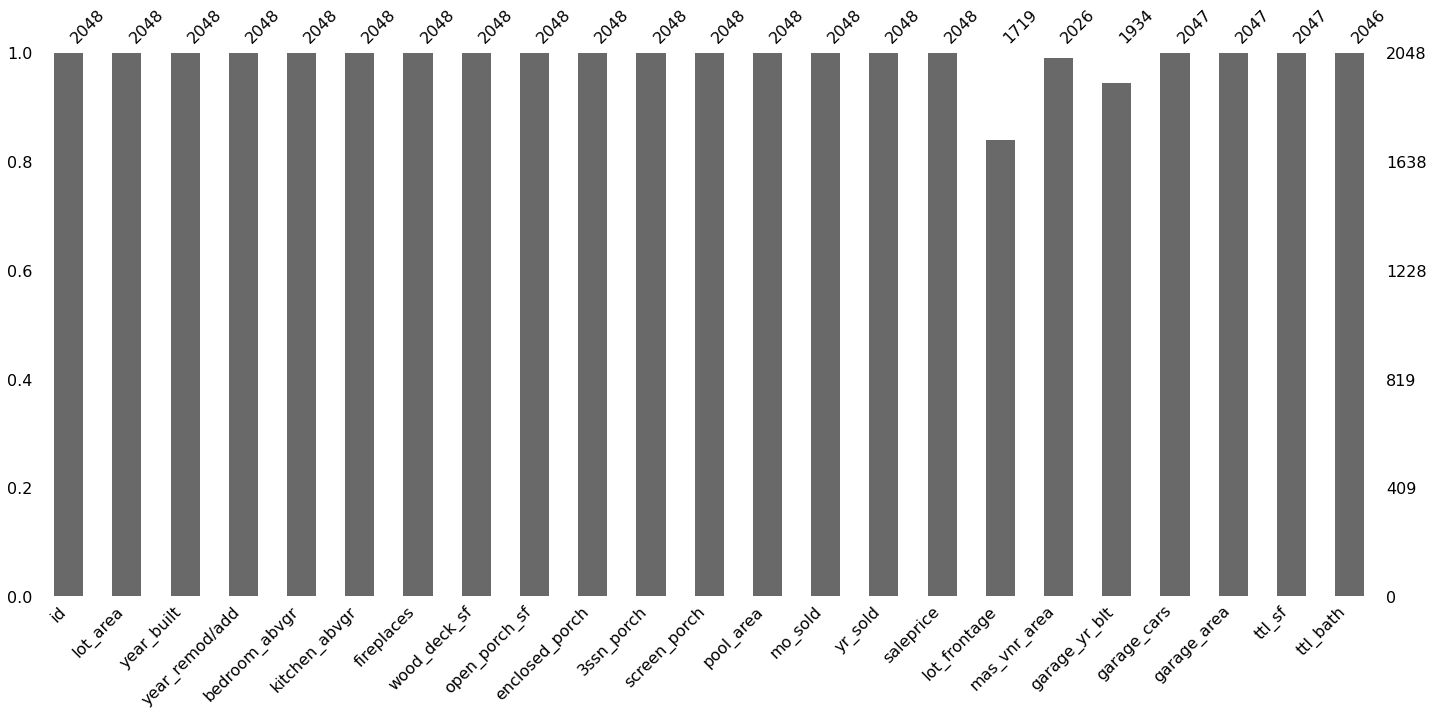

In [704]:
msno.bar(numerics);

In [705]:
def fill_na_mean(df):
    #Cleans float and integer NaNs by replacing with mean for whole dataframe
    for item in df.columns:
        if df[item].dtypes == float or df[item].dtypes == int:
            df[item].fillna(df[item].mean(), inplace = True)

In [706]:
fill_na_mean(numerics)

/Users/jamesopacich/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


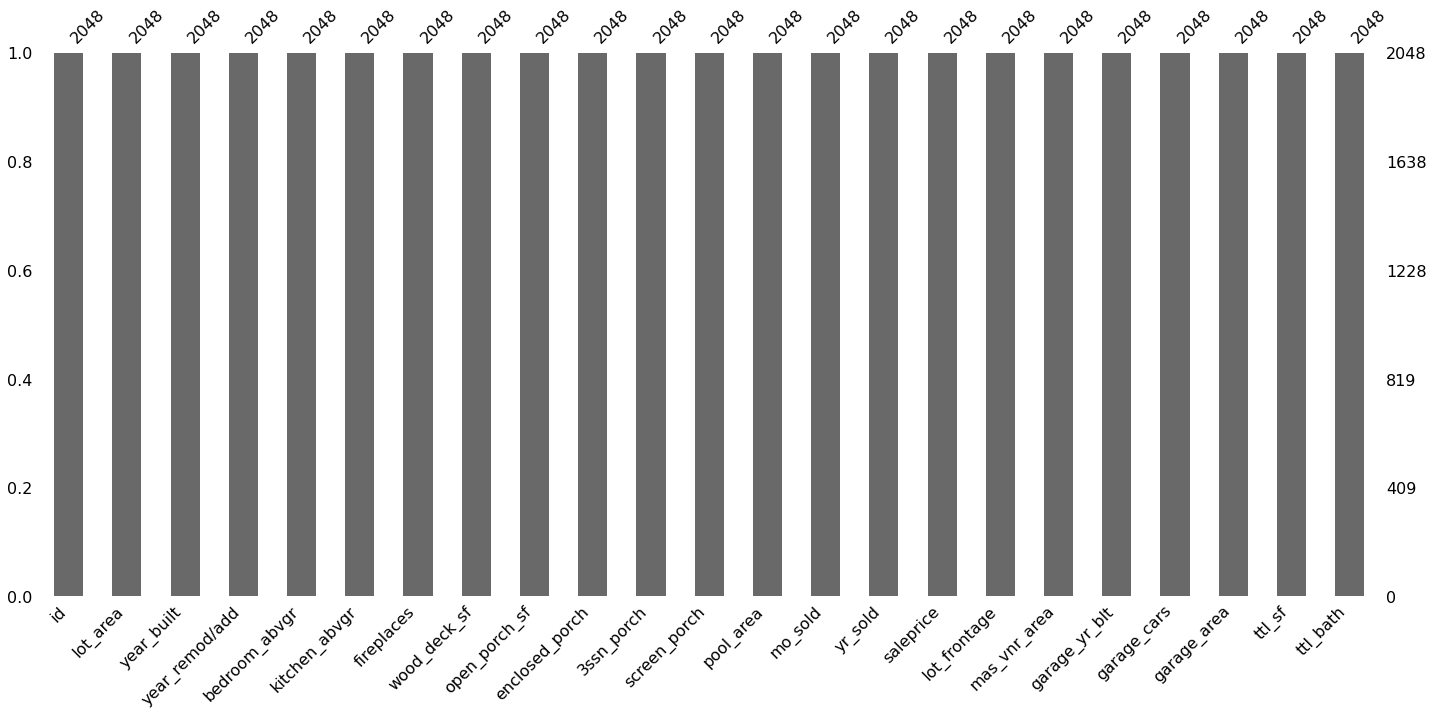

In [707]:
msno.bar(numerics);

In [708]:
numerics['garage_yr_blt'].max()

2010.0

# Save Numerics to CSV

In [709]:
numerics.to_csv('../datasets/a5_numerics.csv', index = False)

# END INITIAL CLEANING AND EDA ON NUMERICS
_____

# INITIAL CLEANING AND EDA ON NOMINAL VALUES

# Create String Dataframe

In [710]:
strings = ['ms_subclass','ms_zoning', 'street', 'alley',  
           'land_contour',  'lot_config', 
           'neighborhood', 'condition_1', 
           'condition_2', 'bldg_type', 'house_style', 
           'roof_style', 'roof_matl', 'exterior_1st', 
           'exterior_2nd', 'mas_vnr_type', 'foundation', 
           'heating', 'central_air', 'garage_type', 
           'misc_feature', 'sale_type']

In [711]:
strings_df = ames[strings]

In [712]:
strings_df.head()

,ms_subclass,ms_zoning,street,alley,land_contour,lot_config,neighborhood,condition_1,condition_2,bldg_type,...,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,foundation,heating,central_air,garage_type,misc_feature,sale_type
0,60,RL,Pave,NaN,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,...,CompShg,HdBoard,Plywood,BrkFace,CBlock,GasA,Y,Attchd,NaN,WD
1,60,RL,Pave,NaN,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,...,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,Attchd,NaN,WD
2,20,RL,Pave,NaN,Lvl,Inside,NAmes,Norm,Norm,1Fam,...,CompShg,VinylSd,VinylSd,None,CBlock,GasA,Y,Detchd,NaN,WD
3,60,RL,Pave,NaN,Lvl,Inside,Timber,Norm,Norm,1Fam,...,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,BuiltIn,NaN,WD
4,50,RL,Pave,NaN,Lvl,Inside,SawyerW,Norm,Norm,1Fam,...,CompShg,Wd Sdng,Plywood,None,PConc,GasA,Y,Detchd,NaN,WD


### Strings Fill Nulls

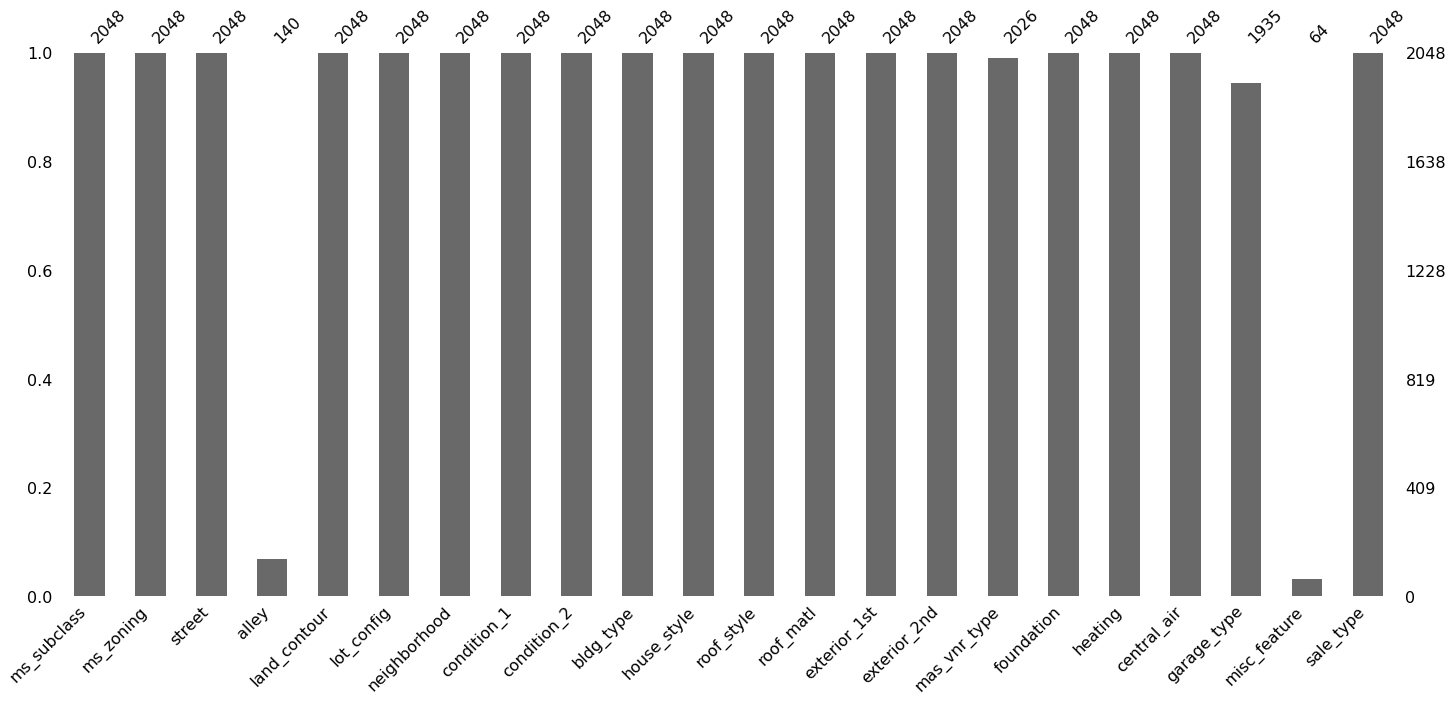

In [713]:
msno.bar(strings_df);

### Delete alley and misc_feature column as they have over 90% nulls

In [714]:
strings_df.drop(columns = ['alley', 'misc_feature'], inplace = True)
strings_df.reset_index(inplace = True)

/Users/jamesopacich/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [715]:
def fill_na_string(df):
    #Cleans string object NaNs by replacing with a string for whole dataframe
    for item in df.columns:
        df[item].fillna('None', inplace = True)

In [716]:
fill_na_string(strings_df)

/Users/jamesopacich/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


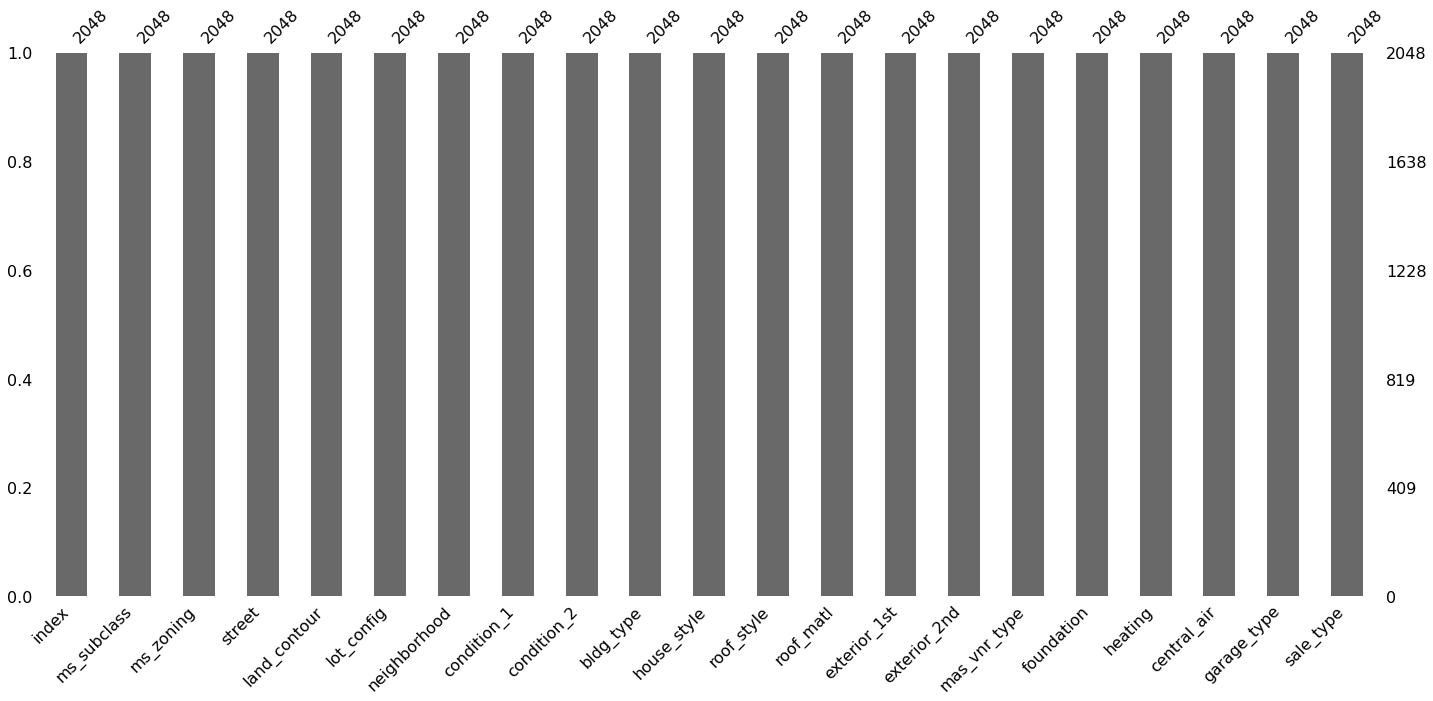

In [717]:
msno.bar(strings_df);

### Add 'saleprice' column to strings for analytical purpose
adding saleprice to ordinals because I am going to future analysis on just ordinals before dropping saleprice column and concatenating ordinals with other dfs to reform original dataframe

In [718]:
strings_df['saleprice'] = ames['saleprice']

<ipython-input-718-3d03e2b84e15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strings_df['saleprice'] = ames['saleprice']


In [719]:
strings_df.columns

Index(['index', 'ms_subclass', 'ms_zoning', 'street', 'land_contour',
       'lot_config', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'foundation', 'heating', 'central_air',
       'garage_type', 'sale_type', 'saleprice'],
      dtype='object')

# Save Nominal Variables to CSV

In [722]:
strings_df.to_csv('../datasets/a5_str_no_dummy.csv')

# Create a Dummy Version and Save to CSV

In [723]:
strings_dummy = pd.get_dummies(strings_df, drop_first = True)

In [724]:
strings_dummy.to_csv('../datasets/a5_str_dummy.csv', index = False)

# Save Test Df to CSV

In [601]:
test.to_csv('../datasets/a5_test1.csv', index = False)

# END INITIAL CLEANING AND EDA ON NOMINALS
___________

# END INITIAL CLEANING AND EDA ON THIS NOTEBOOK
### (SEE NOTEBOOK 'attempt5_EDA' FOR NEXT STEP IN CLEANING AND EDA) 